# E-tivity 2: Data Preparation

### Name: Chris Cashman

### Student ID: 21260508

### Table of Contents

<ol>
    <li><a href="#1">Import Python Modules and Dataset</a></li>
    <li><a href="#2">Process and Encode the Categorical Features</a></li>
        <ol type="a">
            <li><a href="#2a">Encode Ordinal Categorical Attributes</a></li>
            <li><a href="#2b">One-Hot Encode All Other Categorical Attributes</a></li>
        </ol>
    <li><a href="#3">Treatment of Missing Values in Numerical Columns</a></li>
        <ol type="a">
            <li><a href="#3a">Age</a></li>
            <li><a href="#3b">Education</a></li>
        </ol>
    <li><a href="#4">Rescaling Features</a></li>
    <li><a href="#5">Treatment of Outliers</a></li>
    <li><a href="#6">Creation of Derived Features</a></li>
    <li><a href="#7">Save the Prepared Dataset</a></li>
</ol>    

## 1. Import Python Modules and Dataset <a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank.csv")
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [2]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Refresh ourselves on the structure of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [4]:
original_df = df.copy()

## 2. Process and Encode the Categorical Features <a id="2"></a>

In [5]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

### 2a. Encode Ordinal Categorical Attributes <a id="2a"></a>
Here, `education` would be ordinal as it would be in the order; primary, secondary, tertiary. So we need to replace education.

In [6]:
df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [7]:
scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

In [8]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single        2.0      no      392     yes   no   
1  39.0   technician  divorced        1.0      no      688     yes  yes   
2  59.0      retired   married        1.0      no     1035     yes  yes   
3  47.0  blue-collar   married        1.0      no      398     yes  yes   
4  54.0      retired   married        1.0      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

### 2b. One-Hot Encode All Other Categorical Attributes <a id="2b"></a>

In [9]:
print(df.isna().sum().sort_values())
print(df.info())

subscribed      0
marital         0
previous        0
default         0
balance         0
housing         0
loan            0
pdays           0
day             0
month           0
duration        0
campaign        0
job            10
age            12
education     104
contact       191
poutcome      454
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   float64
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  


In [10]:
# Encode categorical columns with known NaN's
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
# Encode the rest
df = pd.get_dummies(df, drop_first=True)

In [11]:
for index, col in enumerate(df.columns):
    print(f"{index+1:2}: {col}")

 1: age
 2: education
 3: balance
 4: day
 5: duration
 6: campaign
 7: pdays
 8: previous
 9: job_blue-collar
10: job_entrepreneur
11: job_housemaid
12: job_management
13: job_retired
14: job_self-employed
15: job_services
16: job_student
17: job_technician
18: job_unemployed
19: job_nan
20: contact_telephone
21: contact_nan
22: poutcome_other
23: poutcome_success
24: poutcome_nan
25: marital_married
26: marital_single
27: default_yes
28: housing_yes
29: loan_yes
30: month_aug
31: month_dec
32: month_feb
33: month_jan
34: month_jul
35: month_jun
36: month_mar
37: month_may
38: month_nov
39: month_oct
40: month_sep
41: subscribed_yes


## 3. Treatment of Missing Values in Numerical Columns  <a id="3"></a>

We are going to have to replace the NaN's in `education` and `age`.

In [12]:
null_count = df.isna().sum()
null_count[null_count > 0].sort_values(ascending=False)

education    104
age           12
dtype: int64

### 3a. Age <a id="3a"></a>

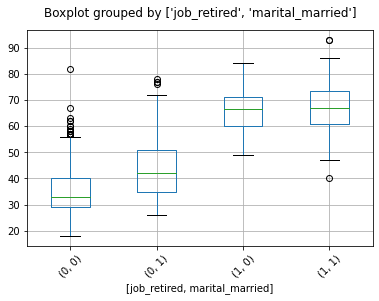

In [13]:
df.boxplot(column='age', by=['job_retired','marital_married'], rot=45)
plt.title("")
plt.show()

Find rows where both columns with NaN's are NaN's. <br>
Good, there are no rows where both age is null and the row 

In [14]:
df[pd.isnull(df[['age']]).any(axis=1) & df[df['job_nan'] == 1]['job_nan']]

Empty DataFrame
Columns: [age, education, balance, day, duration, campaign, pdays, previous, job_blue-collar, job_entrepreneur, job_housemaid, job_management, job_retired, job_self-employed, job_services, job_student, job_technician, job_unemployed, job_nan, contact_telephone, contact_nan, poutcome_other, poutcome_success, poutcome_nan, marital_married, marital_single, default_yes, housing_yes, loan_yes, month_aug, month_dec, month_feb, month_jan, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep, subscribed_yes]
Index: []

[0 rows x 41 columns]

In [15]:
# Double check
df[df['age'].isna()][['age','job_nan']]

age  job_nan
456   NaN        0
472   NaN        0
526   NaN        0
595   NaN        0
597   NaN        0
601   NaN        0
605   NaN        0
744   NaN        0
795   NaN        0
1171  NaN        0
1232  NaN        0
1408  NaN        0

Using our original, we will get the median age of each job and set that to the equal to the corresponding job where age is null.

In [16]:
median_job_age = original_df.groupby('job')['age'].median()
median_job_age

job
admin.           39.0
blue-collar      38.0
entrepreneur     44.0
housemaid        48.0
management       37.0
retired          67.0
self-employed    35.0
services         36.0
student          25.0
technician       38.0
unemployed       39.0
Name: age, dtype: float64

In [17]:
indices = df[df['age'].isna()].index
df[df['age'].isna()]

age  education  balance  day  duration  campaign  pdays  previous  \
456   NaN        2.0      917    6       518         3    212         5   
472   NaN        0.0      474    9       152         3    221         1   
526   NaN        1.0     2478   28       347         1    230         1   
595   NaN        2.0     1857   29       386         1    168         4   
597   NaN        1.0      254   29       194         1    188         1   
601   NaN        1.0      111   29        55         1    195         3   
605   NaN        2.0     1330   29        41         2    261         1   
744   NaN        2.0      -61   30        90         5    172         1   
795   NaN        2.0      992    4       301         1     88         2   
1171  NaN        2.0     2812    3       392         4    181         3   
1232  NaN        1.0      431   19       418        11    185         5   
1408  NaN        2.0      251   12       537         1     -1         0   

      job_blue-collar  job_entrepreneur  ...  month_feb  month_jan  month_jul  \
456                 0                 0  ...          1          0          0   
472                 1                 0  ...          1          0          0   
526                 0                 0  ...          0          1          0   
595                 0                 0  ...          0          1          0   
597                 0                 0  ...          0          1          0   
601                 0                 0  ...          0          1          0   
605                 0                 0  ...          0          1          0   
744                 0                 0  ...          0          1          0   
795                 0                 0  ...          0          0          0   
1171                0                 0  ...          0          0          0   
1232                0                 0  ...          0          0          0   
1408                0                 0  ...          0          0          1   

      month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
456           0          0          0          0          0          0   
472           0          0          0          0          0          0   
526           0          0          0          0          0          0   
595           0          0          0          0          0          0   
597           0          0          0          0          0          0   
601           0          0          0          0          0          0   
605           0          0          0          0          0          0   
744           0          0          0          0          0          0   
795           0          0          1          0          0          0   
1171          0          0          0          0          0          0   
1232          0          0          0          0          0          0   
1408          0          0          0          0          0          0   

      subscribed_yes  
456                0  
472                0  
526                0  
595                0  
597                0  
601                0  
605                0  
744                0  
795                0  
1171               1  
1232               1  
1408               1  

[12 rows x 41 columns]

In [18]:
for job in median_job_age.index[1:]:
    df.loc[df['age'].isna() & df['job_' + job] == 1, 'age'] = median_job_age[job]
    
# admin. job is missing so replace any remaining NaN's with median admin. age
df['age'].fillna(median_job_age['admin.'], inplace=True)

Looks good, now to do the same with education

In [19]:
df.loc[indices].T

456    472     526     595    597    601     605    744   \
age                 35.0   38.0    36.0    37.0   35.0   39.0    37.0   37.0   
education            2.0    0.0     1.0     2.0    1.0    1.0     2.0    2.0   
balance            917.0  474.0  2478.0  1857.0  254.0  111.0  1330.0  -61.0   
day                  6.0    9.0    28.0    29.0   29.0   29.0    29.0   30.0   
duration           518.0  152.0   347.0   386.0  194.0   55.0    41.0   90.0   
campaign             3.0    3.0     1.0     1.0    1.0    1.0     2.0    5.0   
pdays              212.0  221.0   230.0   168.0  188.0  195.0   261.0  172.0   
previous             5.0    1.0     1.0     4.0    1.0    3.0     1.0    1.0   
job_blue-collar      0.0    1.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_entrepreneur     0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_housemaid        0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_management       0.0    0.0     0.0     1.0    0.0    0.0     1.0    1.0   
job_retired          0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_self-employed    1.0    0.0     0.0     0.0    1.0    0.0     0.0    0.0   
job_services         0.0    0.0     1.0     0.0    0.0    0.0     0.0    0.0   
job_student          0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_technician       0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_unemployed       0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
job_nan              0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
contact_telephone    0.0    1.0     0.0     0.0    0.0    0.0     0.0    0.0   
contact_nan          0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
poutcome_other       0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
poutcome_success     0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
poutcome_nan         0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
marital_married      1.0    1.0     1.0     1.0    1.0    0.0     1.0    1.0   
marital_single       0.0    0.0     0.0     0.0    0.0    1.0     0.0    0.0   
default_yes          0.0    0.0     0.0     0.0    1.0    0.0     0.0    0.0   
housing_yes          0.0    1.0     1.0     0.0    1.0    1.0     1.0    0.0   
loan_yes             0.0    1.0     0.0     0.0    1.0    0.0     0.0    0.0   
month_aug            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_dec            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_feb            1.0    1.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_jan            0.0    0.0     1.0     1.0    1.0    1.0     1.0    1.0   
month_jul            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_jun            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_mar            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_may            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_nov            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_oct            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
month_sep            0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   
subscribed_yes       0.0    0.0     0.0     0.0    0.0    0.0     0.0    0.0   

                    795     1171   1232   1408  
age                 38.0    67.0   25.0   35.0  
education            2.0     2.0    1.0    2.0  
balance            992.0  2812.0  431.0  251.0  
day                  4.0     3.0   19.0   12.0  
duration           301.0   392.0  418.0  537.0  
campaign             1.0     4.0   11.0    1.0  
pdays               88.0   181.0  185.0   -1.0  
previous             2.0     3.0    5.0    0.0  
job_blue-collar      0.0     0.0    0.0    0.0  
job_entrepreneur     0.0     0.0    0.0    0.0  
job_housemaid        0.0     0.0    0.0    0.0  
job_management       0.0     0.0    0.0    0.0  
job_retired          0

### 3b. Education <a id="3b"></a>

In [20]:
df[df['education'].isna()]

age  education  balance  day  duration  campaign  pdays  previous  \
10    38.0        NaN      715    2       951         1    132         3   
15    38.0        NaN        0    2       477         2    267         1   
124   39.0        NaN        0    2       731         1    193         3   
209   37.0        NaN      247    2       192         2    208         1   
257   46.0        NaN      677    3       425         1     82         1   
...    ...        ...      ...  ...       ...       ...    ...       ...   
1944  39.0        NaN       76   15       200         1    183         1   
1972  29.0        NaN     1584    6       245         1     -1         0   
1985  21.0        NaN     1506   14       340         1     -1         0   
1993  35.0        NaN     2326   16       319         1     -1         0   
1995  20.0        NaN     2785   16       327         2     -1         0   

      job_blue-collar  job_entrepreneur  ...  month_feb  month_jan  month_jul  \
10                  0                 0  ...          0          0          0   
15                  1                 0  ...          0          0          0   
124                 1                 0  ...          1          0          0   
209                 0                 0  ...          1          0          0   
257                 0                 0  ...          1          0          0   
...               ...               ...  ...        ...        ...        ...   
1944                0                 0  ...          0          0          0   
1972                0                 0  ...          0          0          0   
1985                0                 0  ...          0          0          0   
1993                0                 0  ...          0          0          0   
1995                0                 0  ...          0          0          0   

      month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
10            0          0          0          0          0          0   
15            0          0          0          0          0          0   
124           0          0          0          0          0          0   
209           0          0          0          0          0          0   
257           0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1944          0          0          0          0          0          1   
1972          0          0          0          0          0          1   
1985          0          0          0          0          0          1   
1993          0          0          0          0          0          1   
1995          0          0          0          0          0          1   

      subscribed_yes  
10                 0  
15                 0  
124                0  
209                0  
257                0  
...              ...  
1944               1  
1972               1  
1985               1  
1993               1  
1995               1  

[104 rows x 41 columns]

Balance is a bit of a no go, we can see a slightly higher median bank balance as education increases - instead I have elected to base education on job. It is opened to interpretation by we can see in the `groupby` below that when grouped by education, blue-collar workers top the list people with a primary education, technicians for secondary education and management jobs for tertiary education. I will then set the education level based of the rank of the group. <br>
E.g. If job is `admin.`, it is 5th in primary, 2nd in secondary and 4th in tertiary education. As secondary education was the highest, education will be set to `secondary` or `2` after encoding.

<AxesSubplot:title={'center':'balance'}, xlabel='[education]'>

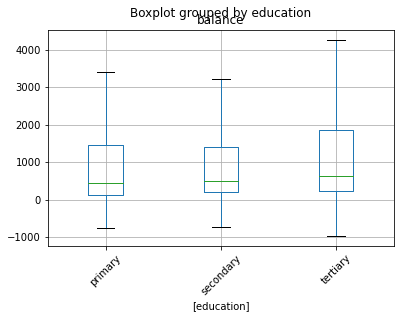

In [21]:
original_df.boxplot(column='balance', by=['education'], rot=45, showfliers=False)

education
primary      AxesSubplot(0.125,0.125;0.775x0.755)
secondary    AxesSubplot(0.125,0.125;0.775x0.755)
tertiary     AxesSubplot(0.125,0.125;0.775x0.755)
Name: balance, dtype: object

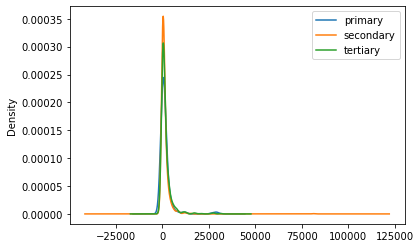

In [22]:
original_df.groupby('education')['balance'].plot(kind='density', legend=True)

***

In [23]:
original_df[original_df['education'].isna()]

age          job  marital education default  balance housing loan  \
10    38.0   management   single       NaN      no      715     yes   no   
15    38.0  blue-collar  married       NaN      no        0     yes   no   
124   39.0  blue-collar  married       NaN      no        0      no   no   
209   37.0   management  married       NaN      no      247      no   no   
257   46.0          NaN  married       NaN      no      677      no   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
1944  39.0   management  married       NaN      no       76      no   no   
1972  29.0   unemployed   single       NaN      no     1584      no   no   
1985  21.0      student   single       NaN      no     1506      no   no   
1993  35.0   management  married       NaN      no     2326     yes  yes   
1995  20.0      student   single       NaN      no     2785      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
10    cellular    2   apr       951         1    132         3  failure   
15    cellular    2   apr       477         2    267         1  failure   
124   cellular    2   feb       731         1    193         3  failure   
209   cellular    2   feb       192         2    208         1  failure   
257   cellular    3   feb       425         1     82         1  failure   
...        ...  ...   ...       ...       ...    ...       ...      ...   
1944  cellular   15   sep       200         1    183         1  success   
1972  cellular    6   sep       245         1     -1         0      NaN   
1985  cellular   14   sep       340         1     -1         0      NaN   
1993  cellular   16   sep       319         1     -1         0      NaN   
1995  cellular   16   sep       327         2     -1         0      NaN   

     subscribed  
10           no  
15           no  
124          no  
209          no  
257          no  
...         ...  
1944        yes  
1972        yes  
1985        yes  
1993        yes  
1995        yes  

[104 rows x 17 columns]

In [24]:
education_groupby = original_df.groupby('education')['job'].value_counts()

education_primary = education_groupby['primary']
education_secondary = education_groupby['secondary']
education_tertiary = education_groupby['tertiary']

In [25]:
education_groupby

education  job          
primary    blue-collar       93
           retired           53
           housemaid         16
           services          12
           admin.            10
           management         9
           technician         9
           unemployed         5
           entrepreneur       4
           student            4
secondary  technician       217
           admin.           194
           blue-collar      185
           services         135
           retired           77
           student           59
           unemployed        43
           management        38
           entrepreneur      18
           self-employed     15
           housemaid         12
tertiary   management       391
           technician       102
           self-employed     47
           admin.            35
           entrepreneur      22
           retired           22
           unemployed        20
           student           16
           services          11
           blue

In [26]:
for job in original_df['job'].dropna().unique():
    print(job)

technician
retired
blue-collar
self-employed
services
management
admin.
unemployed
student
entrepreneur
housemaid


In [27]:
for job in original_df['job'].dropna().unique():
    
#     print(job)
    
    # Assume primary education
    education = 'primary'
    education_encoded = 0
    
    primary_rank = education_primary.index.get_loc('admin.')
    
    if primary_rank > education_secondary.index.get_loc(job):
        education = 'secondary'
        education_encoded = 1
    elif primary_rank > education_tertiary.index.get_loc(job):
        education = 'tertiary'
        education_encoded = 2
        
    if job == 'admin.':
        admin_education = education_encoded
        continue
        
    df.loc[df['education'].isna() & df['job_' + job] == 1, 'education'] = education_encoded
    
# As job admin. is not in the columns we must add this manually
df['education'].fillna(admin_education, inplace=True)

In [28]:
for job in median_job_age.index[1:]:
    df.loc[df['age'].isna() & df['job_' + job] == 1, 'age'] = median_job_age[job]

In [29]:
df.isna().sum()

age                  0
education            0
balance              0
day                  0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
month_aug            0
month_dec            0
month_feb            0
month_jan            0
month_jul            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
month_oct            0
month_sep            0
subscribed_yes       0
dtype: int64

In retrospect, I should have done this before I encoded the categorical variables. Would have made everything a lot easier.

## 4. Rescaling Features  <a id="4"></a>

No need to throw everything into the rescalar

In [30]:
df.select_dtypes(exclude='uint8').columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [31]:
robust_scaler = RobustScaler()
df[['balance', 'duration']] = robust_scaler.fit_transform(df[['balance', 'duration']])

In [32]:
df.education.unique()

array([2., 1., 0.])

In [33]:
df['education'] = df['education']/2

## 5. Treatment of Outliers  <a id="5"></a>

Quite a few outliers in both balance and campaign

<AxesSubplot:>

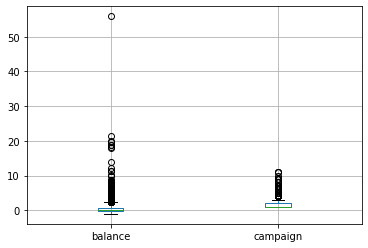

In [34]:
df.boxplot(column=['balance','campaign'])

In [35]:
df[['balance','campaign']].min()

balance    -1.060984
campaign    1.000000
dtype: float64

In [36]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance'] + 1.061)
df['campaign'] = np.log(df['campaign'] - 0.99)

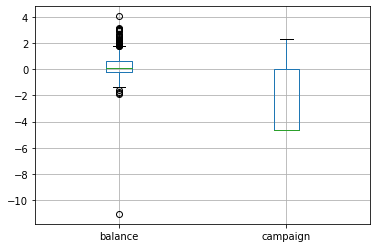

In [37]:
df.boxplot(column=['balance','campaign']);

## 6. Creation of Derived Features <a id="6"></a>

In [38]:
df['previously_contacted_yes'] = 1

In [39]:
df.loc[df['pdays'] == -1, 'previously_contacted_yes'] = 0

In [40]:
df.tail()

age  education   balance  day  duration  campaign  pdays  previous  \
1995  20.0        0.0  0.959030   16  0.390558   0.00995     -1         0   
1996  28.0        0.5 -0.265050   16  4.712446   0.00995     -1         0   
1997  81.0        0.0  0.391285   17 -0.021459  -4.60517     -1         0   
1998  46.0        0.0  1.305317   20 -0.218884  -4.60517     -1         0   
1999  40.0        0.5  1.632459   22 -0.120172   0.00995     -1         0   

      job_blue-collar  job_entrepreneur  ...  month_jan  month_jul  month_jun  \
1995                0                 0  ...          0          0          0   
1996                0                 0  ...          0          0          0   
1997                0                 0  ...          0          0          0   
1998                0                 0  ...          0          0          0   
1999                0                 1  ...          0          0          0   

      month_mar  month_may  month_nov  month_oct  month_sep  subscribed_yes  \
1995          0          0          0          0          1               1   
1996          0          0          0          0          1               1   
1997          0          0          0          0          1               1   
1998          0          0          0          0          1               1   
1999          0          0          0          0          1               1   

      previously_contacted_yes  
1995                         0  
1996                         0  
1997                         0  
1998                         0  
1999                         0  

[5 rows x 42 columns]

## 7. Save the Prepared Dataset <a id="7"></a>

In [41]:
df.to_csv('bank_prepared.csv')